<a href="https://colab.research.google.com/github/josedavidcortes-com/MachineLearningFundamentals/blob/main/JoseDavidCortes_MLF%5BProject5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np
import seaborn as sns
%matplotlib inline

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/datasets/dataset_iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


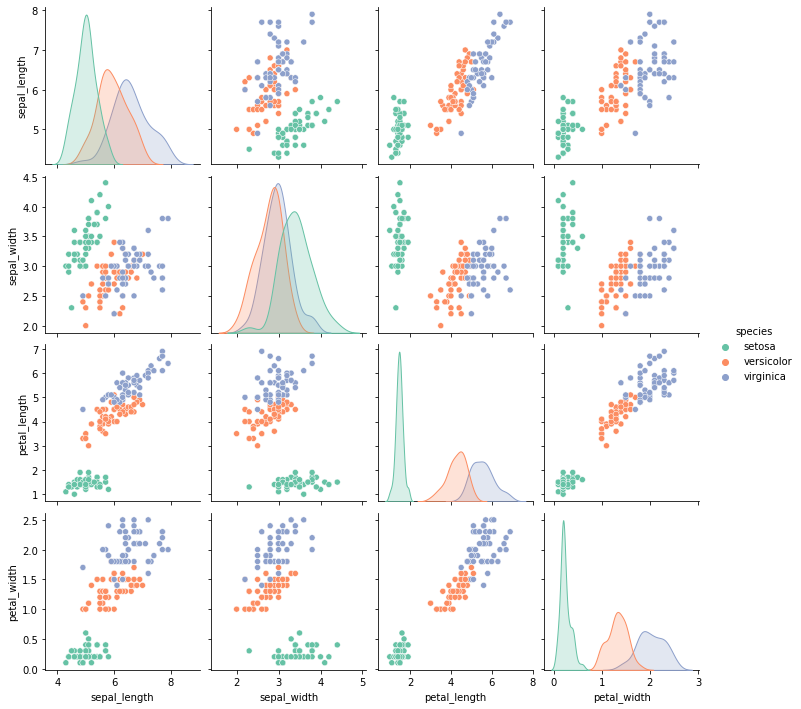

In [31]:
sns.pairplot(data=dataset, hue='species', palette='Set2')

In [32]:
array = dataset.values
X = array[:, :4]
Y = array[:,4]

In [33]:
X = dataset[dataset.columns[0:4]]
Y = dataset[dataset.columns[4:5]]
Y = Y.values.flatten()


In [34]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [35]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 52)

In [37]:
gaussian = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
linear = SVC(kernel='linear', C=1).fit(X_train, y_train)

In [38]:
poly_pred = poly.predict(X_test)
gaussian_pred = gaussian.predict(X_test)
linear_pred = linear.predict(X_test)

In [39]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')


In [40]:
gaussian_accuracy = accuracy_score(y_test, gaussian_pred)
rbf_f1 = f1_score(y_test, gaussian_pred, average='weighted')

In [41]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')

In [42]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

print()

print('Accuracy (RBF / Gaussian Kernel): ', "%.2f" % (gaussian_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

print()

print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Polynomial Kernel):  96.67
F1 (Polynomial Kernel):  96.63

Accuracy (RBF / Gaussian Kernel):  93.33
F1 (RBF Kernel):  93.33

Accuracy (Linear Kernel):  96.67
F1 (Linear Kernel):  96.63


In [43]:
print("Linear Kernel Data")
print(confusion_matrix(y_test,linear_pred))
print(classification_report(y_test,linear_pred))

Linear Kernel Data
[[ 7  0  0]
 [ 0  8  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [44]:
print("Gaussian Kernel Data")
print(confusion_matrix(y_test,gaussian_pred))
print(classification_report(y_test,gaussian_pred))

Gaussian Kernel Data
[[ 7  0  0]
 [ 0  8  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.89      0.89      0.89         9
   virginica       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [45]:
print("Polynomial Kernel Data")
print(confusion_matrix(y_test,poly_pred))
print(classification_report(y_test,poly_pred))

Polynomial Kernel Data
[[ 7  0  0]
 [ 0  8  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

